In [146]:
import pickle
import numpy as np

In [147]:
with open("files/dl/train_qa.txt", "rb") as fp:
    train_data = pickle.load(fp)

In [148]:
with open("files/dl/test_qa.txt", "rb") as fp:
    test_data = pickle.load(fp)

In [149]:
type(test_data)

list

In [150]:
len(test_data), len(train_data)

(1000, 10000)

In [151]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [8]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [10]:
train_data[0][2]

'no'

In [11]:
vocab = set()

In [15]:
all_data = test_data + train_data
len(all_data)

11000

In [13]:
for story, question, answer in all_data:

    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))
    vocab.add(answer)

In [14]:
len(vocab)

37

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
vocab_len = len(vocab) + 1

In [19]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [20]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

In [21]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [22]:
vocab_size = len(vocab) + 1

In [23]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [25]:
tokenizer.word_index

{'yes': 1,
 'bathroom': 2,
 'discarded': 3,
 'took': 4,
 'mary': 5,
 'travelled': 6,
 'left': 7,
 'hallway': 8,
 'to': 9,
 'up': 10,
 'picked': 11,
 'apple': 12,
 'kitchen': 13,
 'daniel': 14,
 'sandra': 15,
 'got': 16,
 'moved': 17,
 'office': 18,
 'milk': 19,
 'down': 20,
 'bedroom': 21,
 '.': 22,
 'dropped': 23,
 'grabbed': 24,
 'football': 25,
 'the': 26,
 'there': 27,
 'journeyed': 28,
 'put': 29,
 'john': 30,
 'back': 31,
 'is': 32,
 'went': 33,
 'in': 34,
 '?': 35,
 'no': 36,
 'garden': 37}

In [26]:
train_st = []
train_qt = []
train_ans = []

for st, q, a in train_data:
    train_st.append(st)
    train_qt.append(q)
    train_ans.append(a)

In [27]:
train_story_seq = tokenizer.texts_to_sequences(train_st)

In [28]:
len(train_st), len(train_story_seq)

(10000, 10000)

In [29]:
tokenizer.word_index

{'yes': 1,
 'bathroom': 2,
 'discarded': 3,
 'took': 4,
 'mary': 5,
 'travelled': 6,
 'left': 7,
 'hallway': 8,
 'to': 9,
 'up': 10,
 'picked': 11,
 'apple': 12,
 'kitchen': 13,
 'daniel': 14,
 'sandra': 15,
 'got': 16,
 'moved': 17,
 'office': 18,
 'milk': 19,
 'down': 20,
 'bedroom': 21,
 '.': 22,
 'dropped': 23,
 'grabbed': 24,
 'football': 25,
 'the': 26,
 'there': 27,
 'journeyed': 28,
 'put': 29,
 'john': 30,
 'back': 31,
 'is': 32,
 'went': 33,
 'in': 34,
 '?': 35,
 'no': 36,
 'garden': 37}

In [34]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    X = []
    Xq = []
    Y = []

    for st, query, answer in data:
        x = [word_index[word.lower()] for word in st]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)

    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [152]:
input_trains, queries_train, answers_train = vectorize_stories(train_data)

In [155]:
input_tests, queries_tests, answers_tests = vectorize_stories(test_data)

In [38]:
input_tests, queries_tests

(array([[ 0,  0,  0, ..., 26, 21, 22],
        [ 0,  0,  0, ..., 26, 37, 22],
        [ 0,  0,  0, ..., 26, 37, 22],
        ...,
        [ 0,  0,  0, ..., 26, 12, 22],
        [ 0,  0,  0, ..., 26, 37, 22],
        [ 0,  0,  0, ..., 12, 27, 22]], dtype=int32),
 array([[32, 30, 34, 26, 13, 35],
        [32, 30, 34, 26, 13, 35],
        [32, 30, 34, 26, 37, 35],
        ...,
        [32,  5, 34, 26, 21, 35],
        [32, 15, 34, 26, 37, 35],
        [32,  5, 34, 26, 37, 35]], dtype=int32))

In [39]:
sum(answers_tests)

array([  0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.])

In [40]:
tokenizer.word_index["yes"]

1

In [41]:
tokenizer.word_index["no"]

36

# creating model

In [42]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM



In [127]:
input_seq = Input((max_story_len, ))
question = Input((max_question_len, ))

In [128]:
vocab_size = len(vocab) + 1
vocab_size

38

# ENcoders

In [129]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [130]:
max_question_len

6

In [131]:
input_seq

<KerasTensor shape=(None, 156), dtype=float32, sparse=None, name=keras_tensor_100>

In [132]:
question

<KerasTensor shape=(None, 6), dtype=float32, sparse=None, name=keras_tensor_101>

In [133]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [134]:
ques_encoder = Sequential()
ques_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_shape=(max_question_len, )))
ques_encoder.add(Dropout(0.3))

In [135]:
input_encoded_m = input_encoder_m(input_seq)

In [136]:
input_encoded_c = input_encoder_c(input_seq)
input_encoded_c.shape

(None, 156, 6)

In [137]:
print(question)
question_encoded = ques_encoder(question)
question_encoded.shape

<KerasTensor shape=(None, 6), dtype=float32, sparse=None, name=keras_tensor_101>


(None, 6, 64)

In [138]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)
match

<KerasTensor shape=(None, 156, 6), dtype=float32, sparse=False, name=keras_tensor_116>

In [139]:
response = add([match, input_encoded_c])
print(response.shape)
response = Permute((2, 1))(response)
response

(None, 156, 6)


<KerasTensor shape=(None, 6, 156), dtype=float32, sparse=False, name=keras_tensor_118>

In [140]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [141]:
answer

<KerasTensor shape=(None, 6, 220), dtype=float32, sparse=False, name=keras_tensor_119>

In [142]:
answer = LSTM(32)(answer)

In [143]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [144]:
answer = Activation('softmax')(answer)

model = Model([input_seq, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [145]:
model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 156)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_20      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_19       │ (None, 156, 64)   │      2,432 │ input_layer_19[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_21       │ (None, 6, 64)     │      2,432 │ input_layer_20[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_7 (Dot)         │ (None, 156, 6)    │          0 │ sequential_19[0]… │
│                     │                   │            │ sequential_21[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 156, 6)    │          0 │ dot_7[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_20       │ (None, 156, 6)    │        228 │ input_layer_19[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 156, 6)    │          0 │ activation_5[0][… │
│                     │                   │            │ sequential_20[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 6, 156)    │          0 │ add_5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 6, 220)    │          0 │ permute[0][0],    │
│ (Concatenate)       │                   │            │ sequential_21[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 32)        │     32,384 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 32)        │          0 │ lstm[0][0]        │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 38)        │      1,254 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 38)        │          0 │ dense[0][0]       │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,730 (151.29 KB)

 Trainable params: 38,730 (151.29 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
history = model.fit([input_trains, queries_train], answers_train, batch_size=32, epochs=120, validation_data=([input_tests, queries_tests], answers_tests))

Epoch 1/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4920 - loss: 1.1579 - val_accuracy: 0.4970 - val_loss: 0.6968
Epoch 2/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4967 - loss: 0.7123 - val_accuracy: 0.4970 - val_loss: 0.6935
Epoch 3/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5054 - loss: 0.6995 - val_accuracy: 0.4970 - val_loss: 0.6939
Epoch 4/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5036 - loss: 0.6960 - val_accuracy: 0.5030 - val_loss: 0.6937
Epoch 5/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4917 - loss: 0.6972 - val_accuracy: 0.4880 - val_loss: 0.6932
Epoch 6/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4953 - loss: 0.6955 - val_accuracy: 0.5030 - val_loss: 0.6933
Epoch 7/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4999 - loss: 0.6952 - val_accuracy: 0.5030 - val_loss: 0.6932
Epoch 8/120
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4926 - loss: 0.6957 - val_accu

In [162]:
filename = 'files/dl/my_chatbot_120_epochs.keras'
model.save(filename)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


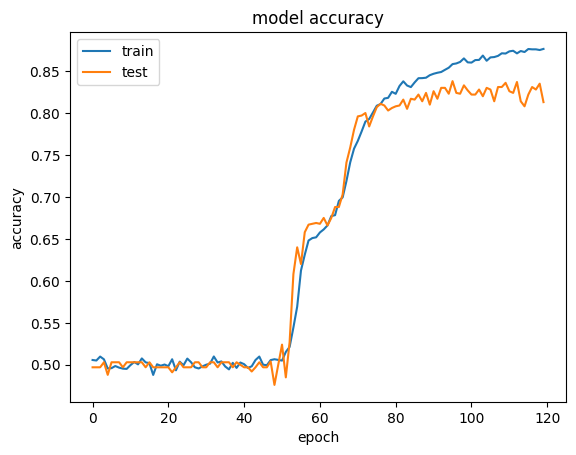

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [167]:
model.load_weights(filename)
pred_results = model.predict(([input_tests, queries_tests]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [168]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [169]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [170]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [171]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [172]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99982476


In [173]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [174]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [175]:
my_question = "Is the football in the garden ?"

In [176]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [177]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [178]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [179]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [180]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.9396882
